In [2]:
import pandas as pd
import json
import geopandas as gpd
import plotly.graph_objects as go

In [3]:
UK_restaurant_rating = "England_data.csv"

rating_data = pd.read_csv(UK_restaurant_rating)

rating_data.head(1)

C:\Users\obsid\AppData\Local\Temp\ipykernel_33800\387965796.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  rating_data = pd.read_csv(UK_restaurant_rating)


,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10029240-d10081305,The Bakery,"[""Europe"", ""United Kingdom (UK)"", ""England"", ""...",England,Surrey,NaN,Byfleet,"Coldharbour Road, Byfleet GU22 8SW England",51.32737,-0.51092,...,6.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


cleaning data

In [4]:
rating_data_clean = rating_data.drop(columns=['restaurant_link', 'original_location', 'claimed',
                                              'popularity_generic', 'price_level', 'price_range',
                                              'meals', 'special_diets', 'original_open_hours',
                                              'open_days_per_week', 'working_shifts_per_week',
                                              'open_hours_per_week', 'default_language',
                                              'atmosphere', 'keywords', 'top_tags', 'reviews_count_in_default_language'
                                              ])

rating_data_clean.head(1)

,restaurant_name,country,region,province,city,address,latitude,longitude,awards,popularity_detailed,...,avg_rating,total_reviews_count,excellent,very_good,average,poor,terrible,food,service,value
0,The Bakery,England,Surrey,NaN,Byfleet,"Coldharbour Road, Byfleet GU22 8SW England",51.32737,-0.51092,NaN,#1 of 1 Bakery in Byfleet,...,5.0,6.0,6.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


sorting data

In [5]:
UK_df = rating_data_clean[rating_data_clean['country'].isin(['England', 'Nothern Ireland', 'Wales', 'Scotland'])]

UK_df.head(2)

,restaurant_name,country,region,province,city,address,latitude,longitude,awards,popularity_detailed,...,avg_rating,total_reviews_count,excellent,very_good,average,poor,terrible,food,service,value
0,The Bakery,England,Surrey,NaN,Byfleet,"Coldharbour Road, Byfleet GU22 8SW England",51.32737,-0.51092,NaN,#1 of 1 Bakery in Byfleet,...,5.0,6.0,6.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,Basmati tandoori,England,Surrey,NaN,Byfleet,"23 High Road, Byfleet KT14 7QH England",51.33914,-0.47811,NaN,#5 of 6 Restaurants in Byfleet,...,3.0,4.0,2.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN


column renaming

In [6]:
UK_df = UK_df.rename(columns={'restaurant_name': 'Restaurant Name', 'country': 'Country', 'region': 'Region',
                                        'province': 'Province', 'city': 'City', 'address': 'Address', 'latitude': 'Latitude',
                                        'longitude': 'Longitude', 'awards': 'Awards', 'popularity_detailed': 'Popularity',
                                        'cuisine': 'Cuisine', 'features': 'Features', 'vegetarian_friendly': 'Vegetarian',
                                        'vegan_options': 'Vegan', 'gluten_free': 'Gluten Free', 'avg_rating': 'Avg Rating',
                                        'total_reviews_count': 'Review Count', 'excellent': 'Excellent', 'very_good': 'Very Good',
                                        'average': 'Average', 'poor': 'Poor', 'terrible': 'Terrible', 'food': 'Food Quality',
                                        'service': 'Service', 'value': 'Value'
                                        
                                        })

UK_df.head(1)

,Restaurant Name,Country,Region,Province,City,Address,Latitude,Longitude,Awards,Popularity,...,Avg Rating,Review Count,Excellent,Very Good,Average,Poor,Terrible,Food Quality,Service,Value
0,The Bakery,England,Surrey,NaN,Byfleet,"Coldharbour Road, Byfleet GU22 8SW England",51.32737,-0.51092,NaN,#1 of 1 Bakery in Byfleet,...,5.0,6.0,6.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


interactive marker map df

In [7]:
chart_1_columns = ['Restaurant Name', 'Country', 'Region',
                   'Province', 'City', 'Address', 'Latitude',
                   'Longitude', 'Awards', 'Avg Rating']
chart_1_df = UK_df.loc[:, chart_1_columns]

chart_1_df.head(1)

,Restaurant Name,Country,Region,Province,City,Address,Latitude,Longitude,Awards,Avg Rating
0,The Bakery,England,Surrey,NaN,Byfleet,"Coldharbour Road, Byfleet GU22 8SW England",51.32737,-0.51092,NaN,5.0


In [ ]:
import plotly.graph_objects as go

chart_1 = pd.read_csv('chart_1.csv')

ratings_categories = {
    '0-0.9': chart_1[(chart_1['Avg Rating'] >= 0) & (chart_1['Avg Rating'] < 1)],
    '1-1.9': chart_1[(chart_1['Avg Rating'] >= 1) & (chart_1['Avg Rating'] < 2)],
    '2-2.9': chart_1[(chart_1['Avg Rating'] >= 2) & (chart_1['Avg Rating'] < 3)],
    '3-3.9': chart_1[(chart_1['Avg Rating'] >= 3) & (chart_1['Avg Rating'] < 4)],
    '4-5': chart_1[(chart_1['Avg Rating'] >= 4) & (chart_1['Avg Rating'] <= 5)]
}

colors = ['red', 'orange', 'yellow', 'green', 'blue']

figures = []

center_lat = chart_1['Latitude'].mean()
center_lon = chart_1['Longitude'].mean()

for i, (rating, data) in enumerate(ratings_categories.items()):
    fig = go.Figure(data=go.Scattermapbox(
        lon=data['Longitude'],
        lat=data['Latitude'],
        mode='markers',
        marker=dict(size=5, color=colors[i]),
        text=[f'Restaurant: {name}, Rating: {rating}' for name in data['Restaurant Name']],
        hoverinfo='text'
    ))
    
    fig.update_layout(
        title=f'Restaurants with Avg Rating {rating}',
        mapbox=dict(
            style='open-street-map',
            zoom=9,
            center=dict(lat=center_lat, lon=center_lon)
        )
    )

    fig.write_html(f'restaurant_ratings_{rating}.html')
    
    figures.append(fig)

for i, fig in enumerate(figures):
    fig.show()

interactive stacked bar chart df

In [8]:
chart_2_columns = ['Restaurant Name', 'Food Quality', 'Service', 'Avg Rating']
chart_2_df = UK_df.loc[:, chart_2_columns]

chart_2_df.head()

,Restaurant Name,Food Quality,Service,Avg Rating
0,The Bakery,NaN,NaN,5.0
1,Basmati tandoori,NaN,NaN,3.0
2,China Chef,NaN,NaN,2.5
3,The Plough,3.5,3.5,3.5
4,Corner Coffee Stop,NaN,NaN,4.5


In [9]:
lat_columns = ['Latitude']
lat = UK_df.loc[:, lat_columns]

lat.head()

,Latitude
0,51.32737
1,51.33914
2,51.33892
3,51.33878
4,51.34628


In [10]:
long_columns = ['Longitude']
long = UK_df.loc[:, long_columns]

long.head()

,Longitude
0,-0.51092
1,-0.47811
2,-0.47643
3,-0.47400
4,-0.48046


In [29]:
print(UK_df['Latitude'].dtype)
print(UK_df['Longitude'].dtype)

float64
float64


clearing NaN values

In [11]:
UK_df['Latitude'] = pd.to_numeric(UK_df['Latitude'], errors='coerce')
UK_df['Longitude'] = pd.to_numeric(UK_df['Longitude'], errors='coerce')

UK_df = UK_df.dropna(subset=['Longitude', 'Latitude'])

In [31]:
print(UK_df[['Latitude', 'Longitude']].head(15))
print(UK_df[['Latitude', 'Longitude']].tail(15))

     Latitude  Longitude
0   51.327370  -0.510920
1   51.339140  -0.478110
2   51.338920  -0.476430
3   51.338780  -0.474000
4   51.346280  -0.480460
5   51.339050  -0.474128
8   56.528614  -5.488422
9   53.490067  -0.845886
11  53.490060  -0.845979
12  53.489532  -0.840177
13  50.921010  -0.114860
14  50.935100  -0.106160
15  50.920960  -0.115518
16  50.918230  -0.108830
17  50.921050  -0.115803
         Latitude  Longitude
171647  54.619427  -3.049844
171648  54.619250  -3.050808
171649  54.618430  -3.054410
171650  52.719627  -0.772557
171651  52.719624  -0.776866
171652  52.299896  -2.747280
171653  52.301388  -2.754034
171654  52.322475  -2.712235
171655  52.388336  -2.761586
171656  53.292484  -3.008288
171657  53.704323  -0.873573
171658  53.706192  -0.914828
171659  53.730110  -1.156390
171660  53.979576  -1.107181
171661  51.482048  -3.594511


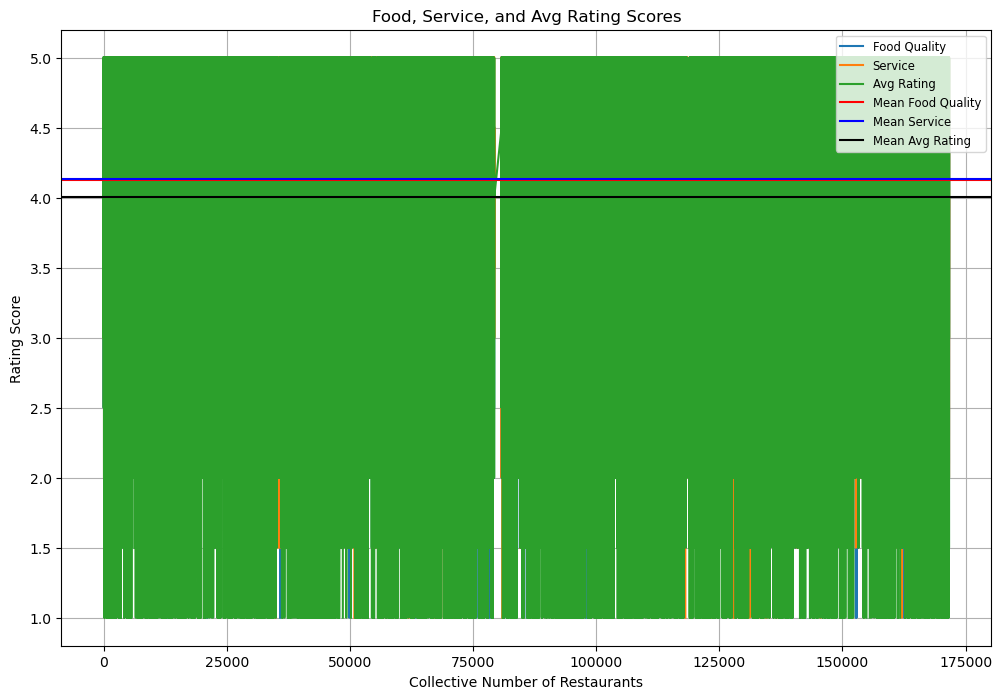

In [38]:

import matplotlib.pyplot as plt

# Assuming `data` is your large dataset DataFrame with multiple columns of interest
columns_of_interest = ['Food Quality', 'Service', 'Avg Rating']  # List all relevant column names
averages = UK_df[columns_of_interest].mean()  # Precompute the means for these columns

# Plotting setup
plt.figure(figsize=(12, 8))
plt.plot(UK_df.index, UK_df['Food Quality'], label='Food Quality')
plt.plot(UK_df.index, UK_df['Service'], label='Service')
plt.plot(UK_df.index, UK_df['Avg Rating'], label='Avg Rating')

# Adding horizontal lines for the mean of each column
plt.axhline(y=averages['Food Quality'], color='red', linestyle='-', label='Mean Food Quality')
plt.axhline(y=averages['Service'], color='blue', linestyle='-', label='Mean Service')
plt.axhline(y=averages['Avg Rating'], color='black', linestyle='-', label='Mean Avg Rating')

plt.xlabel('Collective Number of Restaurants')
plt.ylabel('Rating Score')
plt.title('Food, Service, and Avg Rating Scores')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize='small')
plt.grid(True)
plt.show()

In [12]:
import plotly.express as px

chart_1 = pd.read_csv('chart_1.csv')

bins = [0, 0.9, 1.9, 2.9, 3.9, 5]
labels = ['0-0.9', '1-1.9', '2-2.9', '3-3.9', '4-5']
chart_1['Rating Bin'] = pd.cut(chart_1['Avg Rating'], bins=bins, labels=labels)

rating_counts = chart_1['Rating Bin'].value_counts().sort_index()

fig = px.bar(x=rating_counts.index, y=rating_counts.values,
             labels={'x':'Rating Category',
                     'y':'Count of Restaurants'},
                     title='Distribution of Restaurant Ratings'
            )

fig.update_layout(xaxis_title="Rating Category", yaxis_title="Count of Restaurants")

fig.show()